In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import imutils
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import functools
import os

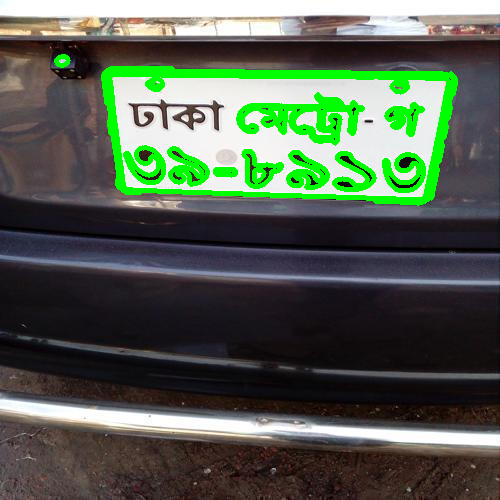

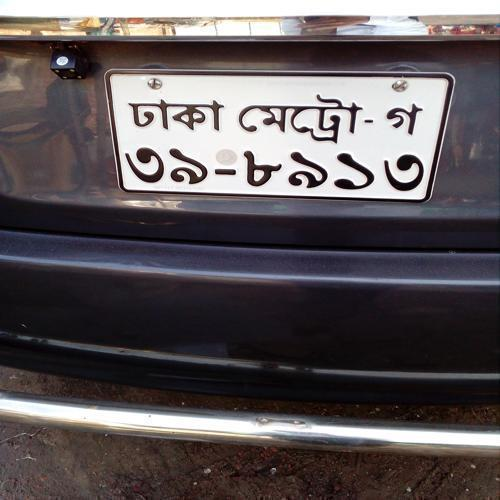

-1

In [ ]:
image = cv2.imread("/content/drive/MyDrive/Colab_Notebooks/capstone/LP_DATASET/car/791.jpg")
image = imutils.resize(image, width = 500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
bilateral = cv2.bilateralFilter(gray, 8,17,17)  #blurring
canny = cv2.Canny(bilateral, 170,200)
cnts, new = cv2.findContours(canny.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image1 = image.copy()
cv2.drawContours(image1,cnts,-1,(0,225,0),3)
cnts =sorted(cnts, key=cv2.contourArea, reverse=True)[:30]
image2 = image.copy()
cv2.drawContours(image2,cnts,-1,(0,255,0),3)



#first it finds the contours from a edge detected image,
#then it sorts the contours to find the largest contours.
#Finally it loop over the contours and used cv2.approxPolyDP function to smooth and approximate the quadrilateral.
# cv2.approxPolyDP works for the cases where there are sharp edges in the contours like a document boundary.
NumberPlateCount = None
count = 0
name = 1
for i in cnts:
  perimeter = cv2.arcLength(i, True)
  approx = cv2.approxPolyDP(i,0.02*perimeter,True)
  if(len(approx)==4):
      NumberPlateCount = approx
      x,y,w,h = cv2.boundingRect(i)
      crp_img = image[y:y+h, x:x+w]
      cv2.imwrite(str(name)+ '.png', crp_img)
      name +=1
      break
      print(NumberPlateCount)
#cv2.drawContours(image,[NumberPlateCount], -1,(0,255,0),3)
crp_img_loc = cv2.imread('1.png')
#cv2_imshow(crp_img_loc) #detect number plate----------------------------------------------------------------------------------------



#text = pytesseract.image_to_string(crp_img_loc, lang='eng')
#print("Number is : NU 19 PL8 ", text)

#cv2_imshow(gray)
#cv2_imshow(bilateral)
#cv2_imshow(canny)
#cv2_imshow(image1)
cv2_imshow(image2)
cv2_imshow(image)


cv2.waitKey(0)

In [ ]:

#character detect-----------------------------------------------------------------------------------

gray2 = cv2.cvtColor(crp_img_loc, cv2.COLOR_BGR2GRAY)
gray3 = cv2.bilateralFilter(gray2, 11,17,17)
edge1 = cv2.Canny(gray3, 170,200)

cnts1, new1 = cv2.findContours(edge1.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image3 = crp_img_loc.copy()
cv2.drawContours(image3,cnts1,-1,(0,225,0),3)
cnts2 =sorted(cnts1, key=cv2.contourArea, reverse=True)[:30]
CharacterCount = None
image4 = crp_img_loc.copy()
cv2.drawContours(image4,cnts2,-1,(0,255,0),3)

#----------------------------------------------------------------------------------
count1 = 0
name1 = 11
for i in cnts2:
    perimeter1 = cv2.arcLength(i, True)
    approx1 = cv2.approxPolyDP(i,0.02*perimeter1,True)
    if(len(approx1)==4):
        CharacterCount = approx1
        x,y,w,h = cv2.boundingRect(i)
        crp_img1 = crp_img_loc[y:y+h, x:x+w]
        cv2.imwrite(str(name1)+ '.png', crp_img1)
        name1 +=1
        break
cv2.drawContours(crp_img_loc,[CharacterCount], -1,(0,255,0),3)
#---------------------------------------------------------------------------------

cv2_imshow(gray2)
cv2_imshow(gray3)
cv2_imshow(edge1)
cv2_imshow(image3)
cv2_imshow(image4)
#cv2_imshow(image)

error: ignored

In [ ]:
#final------------------------------------------------------------------
def preRatioCheck(area, width, height):

        min = 4500
        max = 30000

        ratioMin = 2.5
        ratioMax = 7

        ratio = float(width) / float(height)

        if ratio < 1:
            ratio = 1 / ratio

        if (area < min or area > max) or (ratio < ratioMin or ratio > ratioMax):
            return False

        return True


def validateRatio(rect):
        (x, y), (width, height), rect_angle = rect

        if (width > height):
            angle = -rect_angle
        else:
            angle = 90 + rect_angle

        if angle > 15:
            return False

        if (height == 0 or width == 0):
            return False

        area = width * height

        if not preRatioCheck(area, width, height):
            return False
        else:
            return True


In [ ]:
name = 564

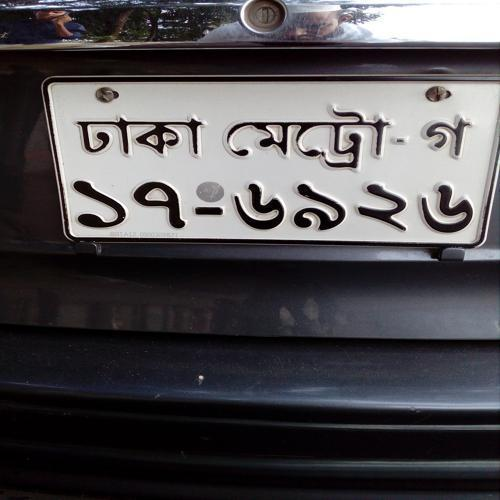

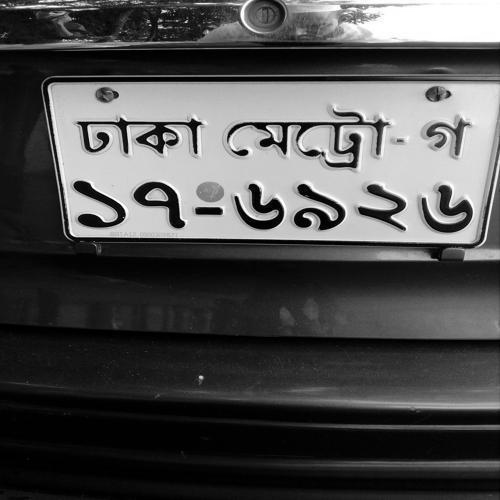

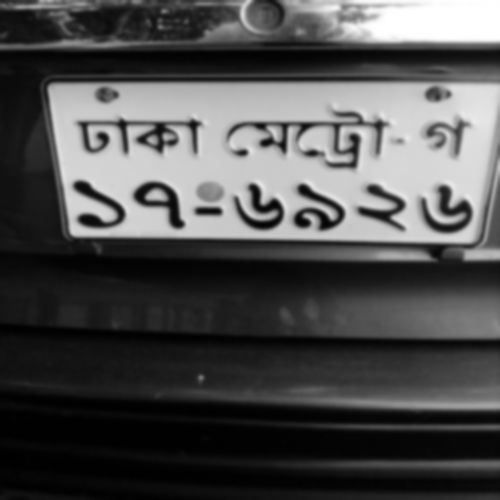

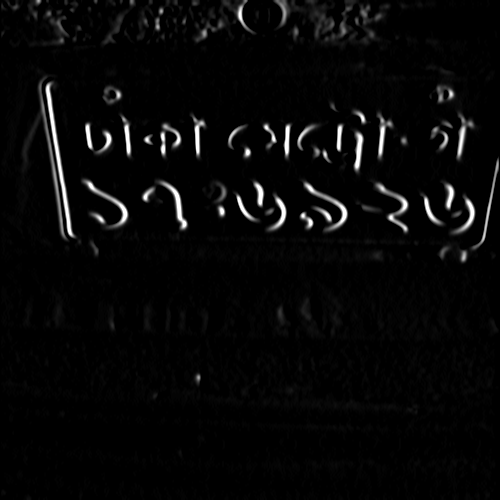

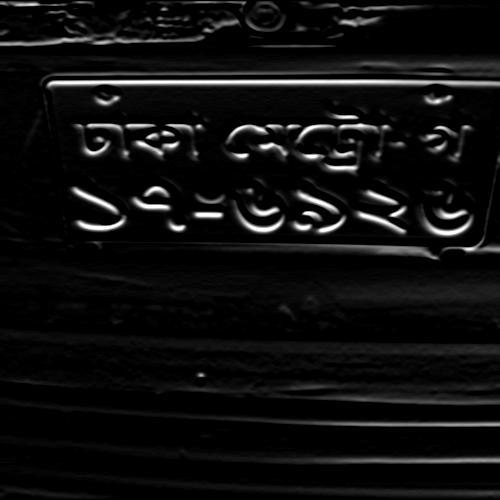

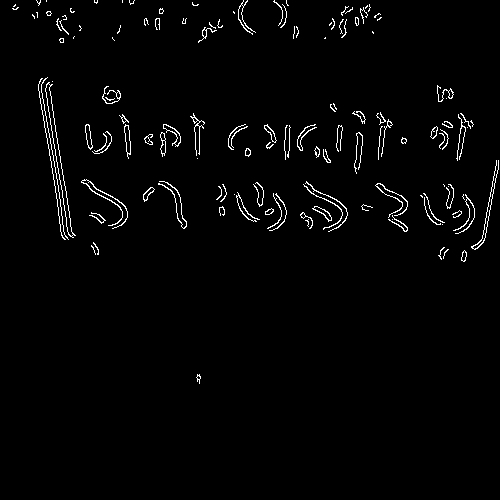

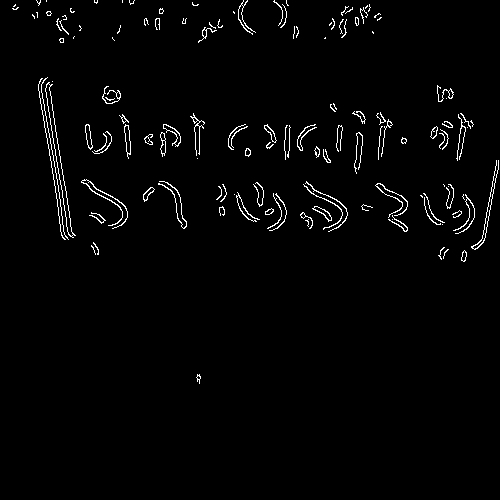

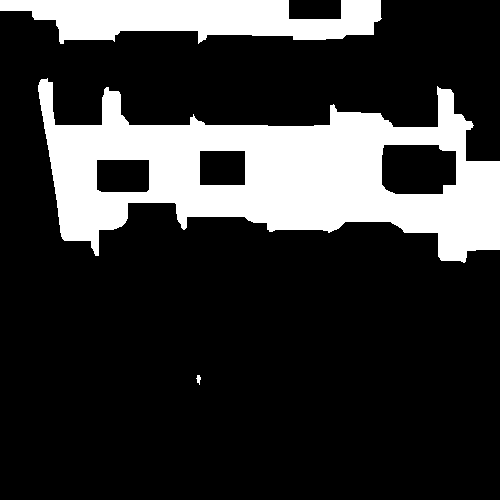

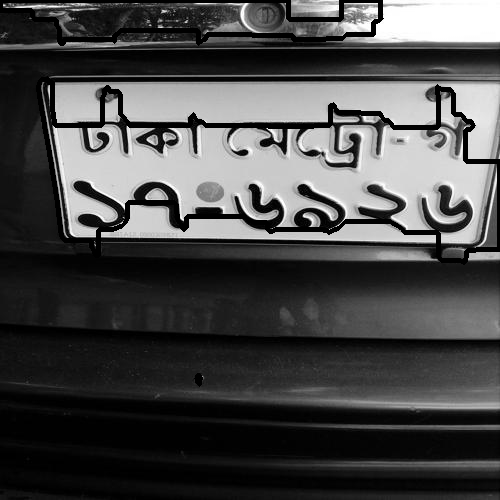

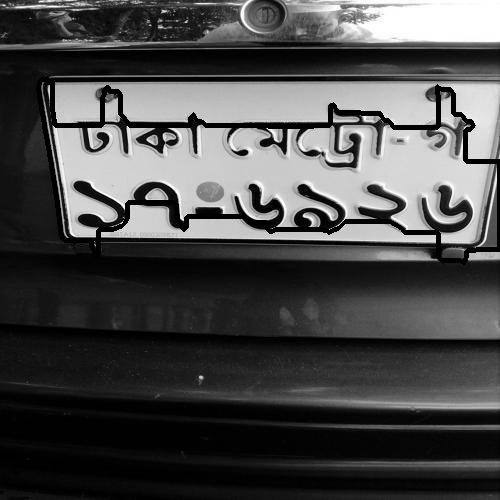

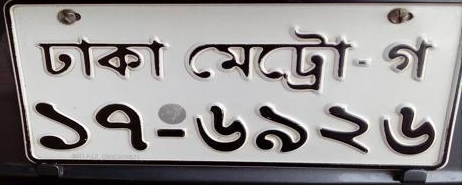

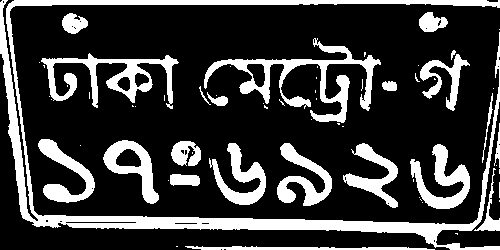

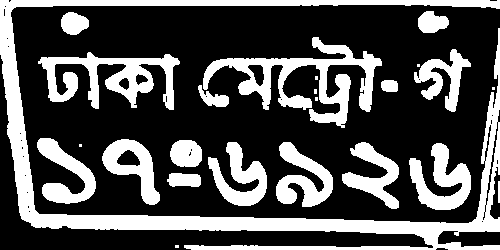

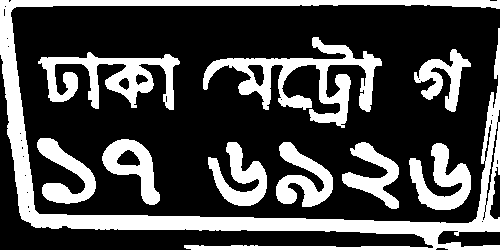

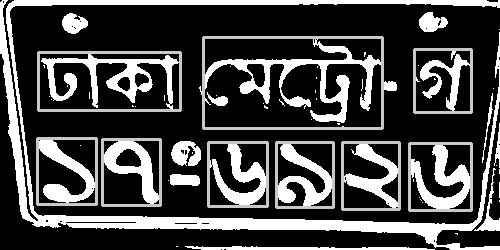

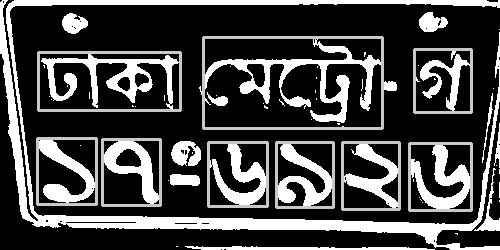

In [ ]:
#main-------------------------------------------------------------------------------
#/content/drive/MyDrive/Colab_Notebooks/capstone/LP_DATASET/car/791.jpg

import cv2
import numpy as np
import imutils
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import functools
import os
car = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/capstone/LP_DATASET/car/792.jpg')#334



cv2_imshow(car)

# convert to gray
gray = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

imgBlurred = cv2.GaussianBlur(gray, (9, 9), 0)
cv2_imshow(imgBlurred)



# sobelX to get the vertical edges-------------------------------------------------------------------------------------------------------------------------------
sobelx = cv2.Sobel(imgBlurred, cv2.CV_8U, 1, 0, ksize = 3)
cv2_imshow(sobelx)
sobely = cv2.Sobel(imgBlurred, cv2.CV_8U, 0, 1, ksize = 3)
cv2_imshow(sobely)
sobel = sobelx + sobely
#cv2_imshow(sobel)

#canny----------------------------------------------------------------------------
canny = cv2.Canny(sobelx, 170,200)
cv2_imshow(canny)

#dilate----------------------------------------------------------------------------
# bin = cv2.dilate(canny, None)
# cv2_imshow(bin)


#blurred_gray_img--------------------------------------------------------------------
# blurred_gray_img = cv2.adaptiveThreshold(gray, 255,
#                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#                                    cv2.THRESH_BINARY, 11, 2)
#cv2_imshow(blurred_gray_img)


# otsu's thresholding
ret2, threshold_img = cv2.threshold(canny, 0, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(threshold_img)


#-----------------------------------------------------------------------------------
#morph_n_thresholded_img
element = cv2.getStructuringElement(
                              shape = cv2.MORPH_RECT, ksize =(45, 30))
morph_n_thresholded_img = canny.copy()
cv2.morphologyEx(src = canny, op = cv2.MORPH_CLOSE, kernel = element,
                dst = morph_n_thresholded_img)

cv2_imshow(morph_n_thresholded_img)

contours, _ = cv2.findContours(morph_n_thresholded_img,
                                          mode = cv2.RETR_EXTERNAL,
                                          method = cv2.CHAIN_APPROX_NONE)
#draw------------------------------------------------------------------------------
image = gray.copy()
cv2.drawContours(image,contours,-1,(0,225,0),3)
cv2_imshow(image)

cnts =sorted(contours, key=cv2.contourArea, reverse=True)[:1]
#print(cnts)
image2 = gray.copy()
cv2.drawContours(image2,cnts,-1,(0,255,0),3)
cv2_imshow(image2)


# NumberPlateCount = None
# count = 0
# name = 1
# for i in cnts:
#   #hull = cv2.convexHull(i)
#   perimeter = cv2.arcLength(i, True)
#   approx = cv2.approxPolyDP(i,0.02*perimeter,True)
#   if(len(approx)==4):
#       NumberPlateCount = approx
#       print(NumberPlateCount)
#       x,y,w,h = cv2.boundingRect(i)
#       crp_img = image2[y:y+h, x:x+w]
#       cv2.imwrite(str(name)+ '.png', crp_img)
#       name +=1
#       break
#--------------------------------------------------------------------------------------
for c in cnts:
  #error--------------------------=========================
  min_rect = cv2.minAreaRect(c)
  x, y, w, h = cv2.boundingRect(c)
  after_validation_img = car[y:y + h, x:x + w]
  cv2_imshow(after_validation_img)


  # if validateRatio(min_rect):
  #   x, y, w, h = cv2.boundingRect(c)
  #   validation_img = car[y:y + h, x:x + w]
  #   cv2_imshow(validation_img)

#--------------------------------------------------------------------------------------
image3 = car.copy()
#cv2.drawContours(image3,[NumberPlateCount], -1,(0,255,0),3)
#crp_img_loc = cv2.imread('1.png')
#cv2_imshow(image3) #detect number plate----------------------------------------------------------------------------------------


#132




#character segmentation--------------------------------------------------------------------------------------------------
resize = cv2.resize(after_validation_img, (500, 250))
#cv2_imshow(resize)

ch_gray = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
#cv2_imshow(ch_gray)

# blurred = cv2.GaussianBlur(ch_gray, (5, 5), 0)
# #cv2_imshow(blurred)

# canny = cv2.Canny(blurred, 170,200)
# #cv2_imshow(canny)
thresh = cv2.adaptiveThreshold(ch_gray, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 29, 15)
cv2_imshow(thresh)

kernel = np.ones((3, 3), 'uint8')
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
cv2_imshow(img_dilation)



#There are many white “blobs” in the binary image.
# We need to determine which white blobs are license plate characters.
#This can be done by applying an algorithm called connected-component analysis.
# Perform connected components analysis on the thresholded image and
# initialize the mask to hold only the components we are interested in
_, labels = cv2.connectedComponents(img_dilation)
mask = np.zeros(thresh.shape, dtype="uint8")



#The connectedComponents method returns labels, a NumPy array with the same dimension as our thresh image.
#Each element in labels is 0 if it is background or >0 if it belongs to a connected-component.
# Each connected-component corresponds a white blob and has a unique label.
#So how can we decide if a white blob is of a character? An heuristic approach is used here.
# From the binary image it can be seen that the number of pixels for every character falls in a certain range.
#Therefore we set a lower boundary and an upper boundary which are the number of pixels within which each connected-component must have:
# Set lower bound and upper bound criteria for characters
total_pixels = after_validation_img.shape[0] * after_validation_img.shape[1]
#print(total_pixels)
lower = total_pixels // 100 # 100 heuristic param, can be fine tuned if necessary
upper = total_pixels // 1 # 6 heuristic param, can be fine tuned if necessary
#print(lower)
#print(upper)

# Loop over the unique components
for (i, label) in enumerate(np.unique(labels)):
    # If this is the background label, ignore it
    if label == 0:
        continue

    # Otherwise, construct the label mask to display only connected component
    # for the current label
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)

    # If the number of pixels in the component is between lower bound and upper bound,
    # add it to our mask
    if numPixels > lower and numPixels < upper:
        mask = cv2.add(mask, labelMask)

cv2_imshow(mask)


#By finding contours we can get the bounding boxes of the license plate characters:
# Find contours and get bounding box for each contour
cnts, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
boundingBoxes = [cv2.boundingRect(c) for c in cnts]

# Sort the bounding boxes from left to right, top to bottom
# sort by Y first, and then sort by X if Ys are similar
def compare(rect1, rect2):
    if abs(rect1[1] - rect2[1]) > 10:
        return rect1[1] - rect2[1]
    else:
        return rect1[0] - rect2[0]
boundingBox = sorted(boundingBoxes, key=functools.cmp_to_key(compare) )

#image with bounding box
result = thresh.copy()
cnt = 0
crop_imgs = []
for box in boundingBox:
  x, y, w, h = box
  #print(w, h) 35,34
  #for reducing garbage check ratio 45
  if(350 > w > 30 and 109 > h > 30):
    cnt+=1
  #if(99999 > w > 0 and 999999>h>45):
    crp_img = result[y:y+h, x:x+w]
    #cv2_imshow(crp_img)
    crop_imgs.append(crp_img)
    path = '/content/drive/MyDrive/Colab_Notebooks/capstone/character_data'
    #cv2.imwrite(os.path.join(path, str(name)+ '.png'), crp_img)
    #name +=1
    cv2.rectangle(result, (box[0], box[1]), (box[0]+box[2], box[1]+box[3]), (200, 200, 200), 2)
cv2_imshow(result)



test = thresh.copy()
if cnt==0:
  max_w = np.max(boundingBoxes)
  for box in boundingBox:
    if box[2] == max_w:
      x, y, w, h = box
      crp_img2 = test[y+10:y+h-10, x+20:x+w-20]
      #print(w)
  #cv2_imshow(crp_img2)
  crp_img2 = cv2.resize(crp_img2, (500, 250))

  #By finding contours we can get the bounding boxes of the license plate characters:
  # Find contours and get bounding box for each contour
  cnts, _ = cv2.findContours(crp_img2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  boundingBoxes = [cv2.boundingRect(c) for c in cnts]


  #image with bounding box
  result = crp_img2.copy()
  cnt = 0
  for box in boundingBoxes:
    x, y, w, h = box
    print(w, h)
    #for reducing garbage check ratio 45
    if(350 > w > 35 and 109 > h > 34):
      cnt+=1
    #if(99999 > w > 0 and 999999>h>45):
      crp_img = result[y:y+h, x:x+w]
      crop_imgs.append(crp_img)
      path = '/content/drive/MyDrive/Colab_Notebooks/capstone/character_data'
      #cv2.imwrite(os.path.join(path, str(name)+ '.png'), crp_img)
      #name +=1
      cv2.rectangle(result, (box[0], box[1]), (box[0]+box[2], box[1]+box[3]), (200, 200, 200), 2)

# for img in crop_imgs:
#   cv2_imshow(img)

# show thresh and result
cv2_imshow(result)






cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import pickle
with open('det_loc.sav', 'wb') as f:
    pickle.dump(det_loc, f)


In [ ]:
#character recognization-----------------------------------------------------------------------------------------------

In [ ]:
import numpy as np
import cv2 as cv
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
import pickle
from google.colab.patches import cv2_imshow

In [ ]:
################ PARAMETERS ########################
Path = '/content/drive/MyDrive/Colab_Notebooks/capstone/c/character_data'
testRatio = 0.2
valRatio = 0.2
imageDimensions= (32,32,3)
batchSizeVal= 50
epochsVal = 30
stepsPerEpochVal = 2000
####################################################
#### IMPORTING DATA/IMAGES FROM FOLDERS
count = 0
images = []     # LIST CONTAINING ALL THE IMAGES
classNo = []    # LIST CONTAINING ALL THE CORRESPONDING CLASS ID OF IMAGES
myList = os.listdir(Path)
#print("Total Classes Detected:",len(myList))
noOfClasses = len(myList)
#print(myList)

traning_image_dirs = os.listdir(Path) #listdir() returns a list containing the names of the entries in the directory given by path
for dir_name in traning_image_dirs:
  label = str(dir_name)
  training_image_path = Path + "/" + dir_name
  #print(label)

  training_images_names = os.listdir(training_image_path)
  #print(training_images_names)
  for image_name in training_images_names:
            image_path = training_image_path  + "/" + image_name
            image = cv.imread(image_path)
            #print(image_path)
            resize_img = cv2.resize(image,(32,32))
            images.append(resize_img)
            classNo.append(label)

#print(classNo)
#print("Total Images in Images List = ",len(images))
#print("Total IDS in classNo List= ",len(classNo))

# CONVERT TO NUMPY ARRAY ---------------------------------------------------------------------------------------
images = np.array(images)
classNo = np.array(classNo)
#print(images.shape)
#cv2_imshow(images[10])
#print(classNo)


# To convert string class to integer
int_classNo=[]
tags = {'০':0, '১':1, '২':2, '৩':3, '৪':4, '৫':5, '৬':6, '৭':7, '৮':8, '৯':9,
        'ঢাকা':10, 'মেট্রো':11, 'খ':12, 'গ':13, 'চ':14, 'ক':15, 'স':16, 'খালী':17,
        'পটুয়া':18, 'পুর':19, 'ম':20, 'ভ':21, 'গাজী':22, 'ঠ':23}

int_classNo = []
for x in classNo:
  for key, value in tags.items():
    if x == key:
      #print(key,value)
      int_classNo.append(value)
#print(int_classNo)


#SPLITTING THE DATA----------------------------------------------------------------------------------
X_train,X_test,y_train,y_test = train_test_split(images,int_classNo,test_size=testRatio)
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=valRatio)
#print(X_train.shape)
#print(X_test.shape)
#print(X_validation.shape)


#PLOT BAR CHART FOR DISTRIBUTION OF IMAGES----------------------------------------------------------
# numOfSamples= []
# for x in int_classNo:
#     #print(len(np.where(y_train==x)[0]))
#     numOfSamples.append(len(np.where(y_train==x)[0]))

# print(y_train)
# plt.figure(figsize=(10,5))
# plt.bar(int_classNo,numOfSamples)
# plt.title("No of Images for each Class")
# plt.xlabel("Class ID")
# plt.ylabel("Number of Images")
# plt.show()

#PREPOSSESSING FUNCTION FOR IMAGES FOR TRAINING
def preProcessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #e = cv2.equalizeHist(img)
    #img = img/255
    return img
#img = preProcessing(X_train[0])
#cv2_imshow(img)

X_train= np.array(list(map(preProcessing,X_train)))
X_test= np.array(list(map(preProcessing,X_test)))
X_validation= np.array(list(map(preProcessing,X_validation)))


#RESHAPE IMAGES --------------------------------------------------------------------------------------------------
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_validation = X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)


#IMAGE AUGMENTATION -------------------------------------------------------------------------------------------------
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

dataGen.fit(X_train)
#training_set = dataGen.flow_from_directory(X_train, y_train, batch_size=batchSizeVal)
#test_set = dataGen.flow_from_directory(X_test, y_test, batch_size=batchSizeVal)

#ONE HOT ENCODING OF MATRICES-----------------------------------------------------------------------------------
y_train = to_categorical(y_train,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
#print(X_train)


#CREATING THE MODEL---------------------------------------------------------------------------
def myModel():
    noOfFilters = 60
    sizeOfFilter1 = (5,5)
    sizeOfFilter2 = (3, 3)
    sizeOfPool = (2,2)
    noOfNodes= 500

    model = Sequential()
    model.add((Conv2D(noOfFilters,sizeOfFilter1,input_shape=(imageDimensions[0],
                      imageDimensions[1],1),activation='relu')))
    model.add((Conv2D(noOfFilters, sizeOfFilter1, activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add((Conv2D(noOfFilters//2, sizeOfFilter2, activation='relu')))
    model.add((Conv2D(noOfFilters//2, sizeOfFilter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(noOfNodes,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses, activation='softmax'))

    model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

cnn_model = myModel()
print(cnn_model.summary())


#### STARTING THE TRAINING PROCESS
history = cnn_model.fit_generator(dataGen.flow(X_train,y_train,
                                 batch_size=batchSizeVal),
                                 epochs=epochsVal,
                                 validation_data=(X_validation,y_validation),
                                 shuffle=1)


# #### PLOT THE RESULTS
# plt.figure(1)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.legend(['training','validation'])
# plt.title('Loss')
# plt.xlabel('epoch')
# plt.figure(2)
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.legend(['training','validation'])
# plt.title('Accuracy')
# plt.xlabel('epoch')
# plt.show()




#### EVALUATE USING TEST IMAGES
score = cnn_model.evaluate(X_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])



cv2.waitKey(0)
cv2.destroyAllWindows()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
12/12 [==============================] - 5s 363ms/step - loss: 9.8186 - accuracy: 0.0755 - val_loss: 2.3887 - val_accuracy: 0.2878
Epoch 2/30
12/12 [==============================] - 4s 350ms/step - loss: 2.7233 - accuracy: 0.1817 - val_loss: 2.2231 - val_accuracy: 0.3453
Epoch 3/30
12/12 [==============================] - 4s 350ms/step - loss: 2.3789 - accuracy: 0.3022 - val_loss: 1.7506 - val_accuracy: 0.4173
Epoch 4/30
12/12 [==============================] - 4s 350ms/step - loss: 2.1203 - accuracy: 0.3867 - val_loss: 1.4849 - val_accuracy: 0.5971
Epoch 5/30
12/12 [==============================] - 4s 349ms/step - loss: 2.1219 - accuracy: 0.3885 - val_loss: 1.7134 - val_accuracy: 0.6906
Epoch 6/30
12/12 [==============================] - 4s 375ms/step - loss: 1.8275 - accuracy: 0.4496 - val_loss: 1.1140 - val_accuracy: 0.6763
Epoch 7/30
12/12 [==============================] - 4s 352ms/step - loss: 1.5900 - accuracy: 0.5755 - val_loss: 0.8969 - val_accuracy: 0.7914
Epoch 

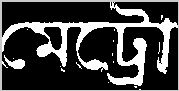

1/1 [==============================] - 0s 19ms/step
prediction accuracy : 0.9999764
predicted class : মেট্রো


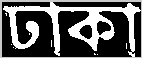

1/1 [==============================] - 0s 20ms/step
prediction accuracy : 0.99999964
predicted class : ঢাকা


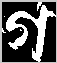

1/1 [==============================] - 0s 18ms/step
prediction accuracy : 0.9998988
predicted class : গ


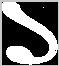

1/1 [==============================] - 0s 18ms/step
prediction accuracy : 0.99999976
predicted class : ১


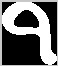

1/1 [==============================] - 0s 18ms/step
prediction accuracy : 0.9997645
predicted class : ৭


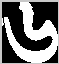

1/1 [==============================] - 0s 17ms/step
prediction accuracy : 0.99998367
predicted class : ৬


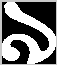

1/1 [==============================] - 0s 18ms/step
prediction accuracy : 0.9862699
predicted class : ৯


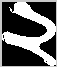

1/1 [==============================] - 0s 19ms/step
prediction accuracy : 0.99996054
predicted class : ২


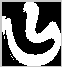

1/1 [==============================] - 0s 18ms/step
prediction accuracy : 0.9999926
predicted class : ৬


In [ ]:
#full number plate recognition testing---------------------------------------------------------------------------------------------
for img in crop_imgs:
  # image_path = img
  # img = cv.imread(image_path)
  cv2_imshow(img)
  #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  resize_img = cv2.resize(img,(32,32))
  img = resize_img.reshape(1,32,32,1)

  tags = {0:'০', 1:'১', 2:'২', 3:'৩', 4:'৪', 5:'৫', 6:'৬', 7:'৭', 8:'৮', 9:'৯',
          10:'ঢাকা', 11:'মেট্রো', 12:'খ', 13:'গ', 14:'চ', 15:'ক', 16:'স', 17:'খালী',
          18:'পটুয়া', 19:'পুর', 20:'ম', 21:'ভ', 22:'গাজী', 23:'ঠ'}

  pred = cnn_model.predict(img)
  classIndex = tags[int(np.argmax(pred, axis=1))]
  probVal = np.amax(pred)

  print('prediction accuracy :',probVal)
  print('predicted class :',classIndex)

In [ ]:
#full number plate recognition testing---------------------------------------------------------------------------------------------
result = []
for img in crop_imgs:
  resize_img = cv2.resize(img,(32,32))
  img = resize_img.reshape(1,32,32,1)

  tags = {0:'০', 1:'১', 2:'২', 3:'৩', 4:'৪', 5:'৫', 6:'৬', 7:'৭', 8:'৮', 9:'৯',
          10:'ঢাকা', 11:'মেট্রো', 12:'খ', 13:'গ', 14:'চ', 15:'ক', 16:'স', 17:'খালী',
          18:'পটুয়া', 19:'পুর', 20:'ম', 21:'ভ', 22:'গাজী', 23:'ঠ'}

  pred = cnn_model.predict(img)
  classIndex = tags[int(np.argmax(pred, axis=1))]
  probVal = np.amax(pred)

  if probVal >0.50:
    result.append(classIndex)
    #print('prediction accuracy :',probVal)
    #print('predicted class :',classIndex)
str1=' '.join([str(elem) for elem in result])

print(str1)

1/1 [==============================] - 0s 17ms/step
মেট্রো ঢাকা গ ১ ৭ ৬ ৯ ২ ৬


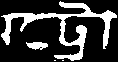

1/1 [==============================] - 0s 75ms/step
prediction accuracy : 0.94866645
predicted class : মেট্রো


In [ ]:
#single image testing---------------------------------------------------------------------------------------------
image_path = "/content/drive/MyDrive/Colab_Notebooks/capstone/c/character_data/মেট্রো/584.png"
img = cv.imread(image_path)
cv2_imshow(img)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
resize_img = cv2.resize(img,(32,32))
img = resize_img.reshape(1,32,32,1)

tags = {0:'০', 1:'১', 2:'২', 3:'৩', 4:'৪', 5:'৫', 6:'৬', 7:'৭', 8:'৮', 9:'৯',
        10:'ঢাকা', 11:'মেট্রো', 12:'খ', 13:'গ', 14:'চ', 15:'ক', 16:'স', 17:'খালী',
        18:'পটুয়া', 19:'পুর', 20:'ম', 21:'ভ', 22:'গাজী', 23:'ঠ'}

pred = cnn_model.predict(img)
classIndex = tags[int(np.argmax(pred, axis=1))]
probVal = np.amax(pred)

print('prediction accuracy :',probVal)
print('predicted class :',classIndex)


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
#alexnet

import tensorflow as tf
import os
import cv2
import cv2 as cv
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D,MaxPooling2D
import pickle
from google.colab.patches import cv2_imshow


################ PARAMETERS ########################
Path = '/content/drive/MyDrive/Colab_Notebooks/capstone/c/character_data'
testRatio = 0.2
valRatio = 0.2
imageDimensions= (227,227,3)
batchSizeVal= 50
epochsVal = 30
stepsPerEpochVal = 2000
####################################################
#### IMPORTING DATA/IMAGES FROM FOLDERS
count = 0
images = []     # LIST CONTAINING ALL THE IMAGES
classNo = []    # LIST CONTAINING ALL THE CORRESPONDING CLASS ID OF IMAGES
myList = os.listdir(Path)
#print("Total Classes Detected:",len(myList))
noOfClasses = len(myList)
#print(myList)

traning_image_dirs = os.listdir(Path) #listdir() returns a list containing the names of the entries in the directory given by path
for dir_name in traning_image_dirs:
  label = str(dir_name)
  training_image_path = Path + "/" + dir_name
  #print(label)

  training_images_names = os.listdir(training_image_path)
  #print(training_images_names)
  for image_name in training_images_names:
            image_path = training_image_path  + "/" + image_name
            image = cv.imread(image_path)
            #print(image.shape)
            resize_img = cv2.resize(image,(227,227))
            images.append(resize_img)
            classNo.append(label)

#print(classNo)
#print("Total Images in Images List = ",len(images))
#print("Total IDS in classNo List= ",len(classNo))

# CONVERT TO NUMPY ARRAY ---------------------------------------------------------------------------------------
images = np.array(images)
classNo = np.array(classNo)
#cv2_imshow(images[10])
#print(classNo)


# To convert string class to integer
int_classNo=[]
tags = {'০':0, '১':1, '২':2, '৩':3, '৪':4, '৫':5, '৬':6, '৭':7, '৮':8, '৯':9,
        'ঢাকা':10, 'মেট্রো':11, 'খ':12, 'গ':13, 'চ':14, 'ক':15, 'স':16, 'খালী':17,
        'পটুয়া':18, 'পুর':19, 'ম':20, 'ভ':21, 'গাজী':22, 'ঠ':23}

int_classNo = []
v=[]
for x in classNo:
  for key, value in tags.items():
    if x == key:
      int_classNo.append(value)

int_classNo = np.reshape(int_classNo, (len(int_classNo), 1))
# print(int_classNo.shape)

#SPLITTING THE DATA----------------------------------------------------------------------------------
X_train,X_test,y_train,y_test = train_test_split(images,int_classNo,test_size=0.2)
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=0.2)
# print(type(y_train))
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)
# print(X_validation.shape, y_validation.shape)

#PLOT BAR CHART FOR DISTRIBUTION OF IMAGES----------------------------------------------------------
# numOfSamples= []
# for x in int_classNo:
#     #print(len(np.where(y_train==x)[0]))
#     numOfSamples.append(len(np.where(y_train==x)[0]))

# print(y_train)
# plt.figure(figsize=(10,5))
# plt.bar(int_classNo,numOfSamples)
# plt.title("No of Images for each Class")
# plt.xlabel("Class ID")
# plt.ylabel("Number of Images")
# plt.show()


def Alexnet_model():
  # (3) Create a sequential model
  model = Sequential()

  # 1st Convolutional Layer
  model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),\
  strides=(4,4), padding='valid'))
  model.add(Activation('relu'))
  # Pooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
  # Batch Normalisation before passing it to the next layer
  model.add(BatchNormalization())

  # 2nd Convolutional Layer
  model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
  model.add(Activation('relu'))
  # Pooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
  # Batch Normalisation
  model.add(BatchNormalization())

  # 3rd Convolutional Layer
  model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
  model.add(Activation('relu'))
  # Batch Normalisation
  model.add(BatchNormalization())

  # 4th Convolutional Layer
  model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
  model.add(Activation('relu'))
  # Batch Normalisation
  model.add(BatchNormalization())

  # 5th Convolutional Layer
  model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
  model.add(Activation('relu'))
  # Pooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
  # Batch Normalisation
  model.add(BatchNormalization())

  # Passing it to a dense layer
  model.add(Flatten())
  # 1st Dense Layer
  model.add(Dense(4096, input_shape=(224*224*3,)))
  model.add(Activation('relu'))
  # Add Dropout to prevent overfitting
  model.add(Dropout(0.4))
  # Batch Normalisation
  model.add(BatchNormalization())

  # 2nd Dense Layer
  model.add(Dense(4096))
  model.add(Activation('relu'))
  # Add Dropout
  model.add(Dropout(0.4))
  # Batch Normalisation
  model.add(BatchNormalization())

  # 3rd Dense Layer
  model.add(Dense(1000))
  model.add(Activation('relu'))
  # Add Dropout
  model.add(Dropout(0.4))
  # Batch Normalisation
  model.add(BatchNormalization())

  # Output Layer
  model.add(Dense(24))
  model.add(Activation('softmax'))
  model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

model = Alexnet_model()
print(model.summary())

#### STARTING THE TRAINING PROCESS
# history = model.fit_generator(dataGen.flow(X_train,y_train,
#                                  batch_size=batchSizeVal),
#                                  epochs=epochsVal,
#                                  validation_data=(X_validation,y_validation),
#                                  shuffle=1)


#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_validation=to_categorical(y_validation)
y_test=to_categorical(y_test)

#Verifying the dimension after one hot encoding
print((X_train.shape,y_train.shape))
print((X_validation.shape,y_validation.shape))
print((X_test.shape,y_test.shape))

#Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

val_generator = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

test_generator = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

#Fitting the augmentation defined above to the data
train_generator.fit(X_train)
#val_generator.fit(X_validation)
#test_generator.fit(X_test)

#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='lr',   factor=.01,   patience=3,  min_lr=1e-5)


#Defining the parameters
batch_size= 50
epochs=30
learn_rate=.001


#Training the model
history = model.fit(train_generator.flow(X_train, y_train, batch_size=batch_size), epochs = epochs,
                            validation_data = (X_validation, y_validation),callbacks = [lrr], verbose=1, shuffle=1)


# validation_steps = 250, callbacks = [lrr], verbose=1,



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 17, 17, 256)       0

In [ ]:
#### EVALUATE USING TEST IMAGES
score = model.evaluate(X_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])



InvalidArgumentError: ignored

Test Score =  0.21896594762802124
Test Accuracy = 0.931034505367279


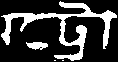

1/1 [==============================] - 0s 46ms/step
prediction accuracy : 0.84444135
predicted class : মেট্রো


In [ ]:
#full number plate recognition testing---------------------------------------------------------------------------------------------
for img in crop_imgs:
  # image_path = img
  # img = cv.imread(image_path)
  cv2_imshow(img)
  img = cv2.merge([img,img,img])
  resize_img = cv2.resize(img,(227, 227))
  img = resize_img.reshape(1,227,227,3)

  tags = {0:'০', 1:'১', 2:'২', 3:'৩', 4:'৪', 5:'৫', 6:'৬', 7:'৭', 8:'৮', 9:'৯',
          10:'ঢাকা', 11:'মেট্রো', 12:'খ', 13:'গ', 14:'চ', 15:'ক', 16:'স', 17:'খালী',
          18:'পটুয়া', 19:'পুর', 20:'ম', 21:'ভ', 22:'গাজী', 23:'ঠ'}

  pred = model.predict(img)
  classIndex = tags[int(np.argmax(pred, axis=1))]
  probVal = np.amax(pred)

  print('prediction accuracy :',probVal)
  print('predicted class :',classIndex)

In [ ]:
#full number plate recognition testing---------------------------------------------------------------------------------------------
result = []
for img in crop_imgs:
  img = cv2.merge([img,img,img])
  resize_img = cv2.resize(img,(227, 227))
  img = resize_img.reshape(1,227,227,3)

  tags = {0:'০', 1:'১', 2:'২', 3:'৩', 4:'৪', 5:'৫', 6:'৬', 7:'৭', 8:'৮', 9:'৯',
          10:'ঢাকা', 11:'মেট্রো', 12:'খ', 13:'গ', 14:'চ', 15:'ক', 16:'স', 17:'খালী',
          18:'পটুয়া', 19:'পুর', 20:'ম', 21:'ভ', 22:'গাজী', 23:'ঠ'}

  pred = model.predict(img)
  classIndex = tags[int(np.argmax(pred, axis=1))]
  probVal = np.amax(pred)

  if probVal >0.50:
    result.append(classIndex)
    #print('prediction accuracy :',probVal)
    #print('predicted class :',classIndex)
str1=' '.join([str(elem) for elem in result])

print(str1)

In [ ]:
#VGG16

# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
from glob import glob
import cv2 as cv
import tensorflow as tf
import os
import cv2
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import pickle
from google.colab.patches import cv2_imshow


# re-size all the images to this
IMAGE_SIZE = [224, 224]

#### IMPORTING DATA/IMAGES FROM FOLDERS
Path = '/content/drive/MyDrive/Colab_Notebooks/capstone/c/character_data'
count = 0
images = []     # LIST CONTAINING ALL THE IMAGES
classNo = []    # LIST CONTAINING ALL THE CORRESPONDING CLASS ID OF IMAGES
myList = os.listdir(Path)
#print("Total Classes Detected:",len(myList))
noOfClasses = len(myList)
#print(myList)

traning_image_dirs = os.listdir(Path) #listdir() returns a list containing the names of the entries in the directory given by path
for dir_name in traning_image_dirs:
  label = str(dir_name)
  training_image_path = Path + "/" + dir_name
  #print(label)

  training_images_names = os.listdir(training_image_path)
  #print(training_images_names)
  for image_name in training_images_names:
            image_path = training_image_path  + "/" + image_name
            image = cv.imread(image_path)
            #print(image.shape)
            resize_img = cv2.resize(image,(224,224))
            images.append(resize_img)
            classNo.append(label)


#print("Total Images in Images List = ",len(images))
#print("Total IDS in classNo List= ",len(classNo))

# CONVERT TO NUMPY ARRAY ---------------------------------------------------------------------------------------
images = np.array(images)
classNo = np.array(classNo)
#cv2_imshow(images[10])
#print(classNo)
print(images.shape)

# To convert string class to integer
int_classNo=[]
tags = {'০':0, '১':1, '২':2, '৩':3, '৪':4, '৫':5, '৬':6, '৭':7, '৮':8, '৯':9,
        'ঢাকা':10, 'মেট্রো':11, 'খ':12, 'গ':13, 'চ':14, 'ক':15, 'স':16, 'খালী':17,
        'পটুয়া':18, 'পুর':19, 'ম':20, 'ভ':21, 'গাজী':22, 'ঠ':23}

int_classNo = []
v=[]
for x in classNo:
  for key, value in tags.items():
    if x == key:
      int_classNo.append(value)

int_classNo = np.reshape(int_classNo, (len(int_classNo), 1))
#print(int_classNo)

#SPLITTING THE DATA----------------------------------------------------------------------------------
X_train,X_test,y_train,y_test = train_test_split(images,int_classNo,test_size=0.2)
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=0.2)



#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_validation=to_categorical(y_validation)
y_test=to_categorical(y_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_validation.shape, y_validation.shape)

# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights


vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

# useful for getting number of output classes
folders = 24

# our layers - you can add more if you want
x = Flatten()(vgg16.output)

prediction = Dense(24, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow(X_train, y_train,
                                  batch_size = 32)

# fit the model
r = model.fit(
  training_set,
  epochs=30,
  validation_data=(X_validation,y_validation)
)





(869, 224, 224, 3)
(556, 224, 224, 3) (556, 24)
(174, 224, 224, 3) (174, 24)
(139, 224, 224, 3) (139, 24)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                     

In [ ]:
#### EVALUATE USING TEST IMAGES
score = model.evaluate(X_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

Test Score =  3.295712471008301
Test Accuracy = 0.9885057210922241


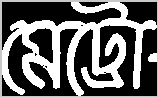

NameError: ignored

In [ ]:
#full number plate recognition testing---------------------------------------------------------------------------------------------
for img in crop_imgs:
  # image_path = img
  # img = cv.imread(image_path)
  cv2_imshow(img)
  img = cv2.merge([img,img,img])
  resize_img = cv2.resize(img,(224, 224))
  img = resize_img.reshape(1,224,224,3)

  tags = {0:'০', 1:'১', 2:'২', 3:'৩', 4:'৪', 5:'৫', 6:'৬', 7:'৭', 8:'৮', 9:'৯',
          10:'ঢাকা', 11:'মেট্রো', 12:'খ', 13:'গ', 14:'চ', 15:'ক', 16:'স', 17:'খালী',
          18:'পটুয়া', 19:'পুর', 20:'ম', 21:'ভ', 22:'গাজী', 23:'ঠ'}

  pred = model.predict(img)
  classIndex = tags[int(np.argmax(pred, axis=1))]
  probVal = np.amax(pred)

  print('prediction accuracy :',probVal)
  print('predicted class :',classIndex)

In [ ]:
#full number plate recognition testing---------------------------------------------------------------------------------------------
result = []
for img in crop_imgs:
  img = cv2.merge([img,img,img])
  resize_img = cv2.resize(img,(227, 227))
  img = resize_img.reshape(1,227,227,3)

  tags = {0:'০', 1:'১', 2:'২', 3:'৩', 4:'৪', 5:'৫', 6:'৬', 7:'৭', 8:'৮', 9:'৯',
          10:'ঢাকা', 11:'মেট্রো', 12:'খ', 13:'গ', 14:'চ', 15:'ক', 16:'স', 17:'খালী',
          18:'পটুয়া', 19:'পুর', 20:'ম', 21:'ভ', 22:'গাজী', 23:'ঠ'}

  pred = model.predict(img)
  classIndex = tags[int(np.argmax(pred, axis=1))]
  probVal = np.amax(pred)

  if probVal >0.50:
    result.append(classIndex)
    #print('prediction accuracy :',probVal)
    #print('predicted class :',classIndex)
str1=' '.join([str(elem) for elem in result])

print(str1)


1/1 [==============================] - 0s 400ms/step
ঢাকা মেট্রো গ ৩ ৭ ৬ ৪ ৭ ৭


In [ ]:
#xception




# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization
from keras.models import Model
from keras.applications.xception import Xception
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
from glob import glob
import cv2 as cv
import tensorflow as tf
import os
import cv2
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import pickle
from google.colab.patches import cv2_imshow


# re-size all the images to this
IMAGE_SIZE = [224, 224]

#### IMPORTING DATA/IMAGES FROM FOLDERS
Path = '/content/drive/MyDrive/Colab_Notebooks/capstone/c/character_data'
count = 0
images = []     # LIST CONTAINING ALL THE IMAGES
classNo = []    # LIST CONTAINING ALL THE CORRESPONDING CLASS ID OF IMAGES
myList = os.listdir(Path)
#print("Total Classes Detected:",len(myList))
noOfClasses = len(myList)
#print(myList)

traning_image_dirs = os.listdir(Path) #listdir() returns a list containing the names of the entries in the directory given by path
for dir_name in traning_image_dirs:
  label = str(dir_name)
  training_image_path = Path + "/" + dir_name
  #print(label)

  training_images_names = os.listdir(training_image_path)
  #print(training_images_names)
  for image_name in training_images_names:
            image_path = training_image_path  + "/" + image_name
            image = cv.imread(image_path)
            #print(image.shape)
            resize_img = cv2.resize(image,(224,224))
            images.append(resize_img)
            classNo.append(label)


#print("Total Images in Images List = ",len(images))
#print("Total IDS in classNo List= ",len(classNo))

# CONVERT TO NUMPY ARRAY ---------------------------------------------------------------------------------------
images = np.array(images)
classNo = np.array(classNo)
#cv2_imshow(images[10])
#print(classNo)
#print(images.shape)

# To convert string class to integer
int_classNo=[]
tags = {'০':0, '১':1, '২':2, '৩':3, '৪':4, '৫':5, '৬':6, '৭':7, '৮':8, '৯':9,
        'ঢাকা':10, 'মেট্রো':11, 'খ':12, 'গ':13, 'চ':14, 'ক':15, 'স':16, 'খালী':17,
        'পটুয়া':18, 'পুর':19, 'ম':20, 'ভ':21, 'গাজী':22, 'ঠ':23}

int_classNo = []
v=[]
for x in classNo:
  for key, value in tags.items():
    if x == key:
      int_classNo.append(value)

int_classNo = np.reshape(int_classNo, (len(int_classNo), 1))
#print(int_classNo)

#SPLITTING THE DATA----------------------------------------------------------------------------------
X_train,X_test,y_train,y_test = train_test_split(images,int_classNo,test_size=0.2)
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=0.2)


#Since we have 24 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 24
y_train=to_categorical(y_train)
y_validation=to_categorical(y_validation)
y_test=to_categorical(y_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_validation.shape, y_validation.shape)

# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights


xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in xception.layers:
    layer.trainable = False

# useful for getting number of output classes
folders = 24

# our layers - you can add more if you want
x = Flatten()(xception.output)

prediction = Dense(24, activation='softmax')(x)

# create a model object
xception_model = Model(inputs=xception.input, outputs=prediction)

# view the structure of the model
xception_model.summary()

# tell the model what cost and optimization method to use
xception_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow(X_train, y_train,
                                  batch_size = 32)

# fit the model
r = xception_model.fit(
  training_set,
  epochs=10,
  validation_data=(X_validation,y_validation)
)





(556, 224, 224, 3) (556, 24)
(174, 224, 224, 3) (174, 24)
(139, 224, 224, 3) (139, 24)
83683744/83683744 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 1

In [ ]:
#### EVALUATE USING TEST IMAGES
score = xception_model.evaluate(X_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

Test Score =  1.0445135831832886
Test Accuracy = 0.9885057210922241


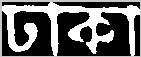

1/1 [==============================] - 1s 1s/step
prediction accuracy : 1.0
predicted class : ঢাকা


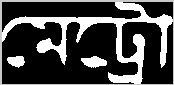

1/1 [==============================] - 0s 239ms/step
prediction accuracy : 1.0
predicted class : মেট্রো


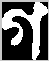

1/1 [==============================] - 0s 234ms/step
prediction accuracy : 1.0
predicted class : গ


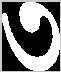

1/1 [==============================] - 0s 239ms/step
prediction accuracy : 1.0
predicted class : ৩


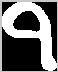

1/1 [==============================] - 0s 238ms/step
prediction accuracy : 1.0
predicted class : ৭


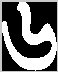

1/1 [==============================] - 0s 252ms/step
prediction accuracy : 1.0
predicted class : ৬


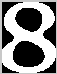

1/1 [==============================] - 0s 254ms/step
prediction accuracy : 1.0
predicted class : ৪


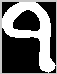

1/1 [==============================] - 0s 239ms/step
prediction accuracy : 1.0
predicted class : ৭


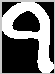

1/1 [==============================] - 0s 356ms/step
prediction accuracy : 1.0
predicted class : ৭


In [ ]:
#full number plate recognition testing---------------------------------------------------------------------------------------------
for img in crop_imgs:
  # image_path = img
  # img = cv.imread(image_path)
  cv2_imshow(img)
  img = cv2.merge([img,img,img])
  resize_img = cv2.resize(img,(224, 224))
  img = resize_img.reshape(1,224,224,3)

  tags = {0:'০', 1:'১', 2:'২', 3:'৩', 4:'৪', 5:'৫', 6:'৬', 7:'৭', 8:'৮', 9:'৯',
          10:'ঢাকা', 11:'মেট্রো', 12:'খ', 13:'গ', 14:'চ', 15:'ক', 16:'স', 17:'খালী',
          18:'পটুয়া', 19:'পুর', 20:'ম', 21:'ভ', 22:'গাজী', 23:'ঠ'}

  pred = xception_model.predict(img)
  classIndex = tags[int(np.argmax(pred, axis=1))]
  probVal = np.amax(pred)

  print('prediction accuracy :',probVal)
  print('predicted class :',classIndex)

In [ ]:
#full number plate recognition testing---------------------------------------------------------------------------------------------
result = []
for img in crop_imgs:
  img = cv2.merge([img,img,img])
  resize_img = cv2.resize(img,(227, 227))
  img = resize_img.reshape(1,227,227,3)

  tags = {0:'০', 1:'১', 2:'২', 3:'৩', 4:'৪', 5:'৫', 6:'৬', 7:'৭', 8:'৮', 9:'৯',
          10:'ঢাকা', 11:'মেট্রো', 12:'খ', 13:'গ', 14:'চ', 15:'ক', 16:'স', 17:'খালী',
          18:'পটুয়া', 19:'পুর', 20:'ম', 21:'ভ', 22:'গাজী', 23:'ঠ'}

  pred = xception_model.predict(img)
  classIndex = tags[int(np.argmax(pred, axis=1))]
  probVal = np.amax(pred)

  if probVal >0.50:
    result.append(classIndex)
    #print('prediction accuracy :',probVal)
    #print('predicted class :',classIndex)
str1=' '.join([str(elem) for elem in result])

print(str1)


1/1 [==============================] - 0s 249ms/step
ঢাকা মেট্রো গ ৩ ৭ ৬ ৪ ৭ ৭


In [ ]:
#DenseNet


# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization
from keras.models import Model
from keras.applications.densenet import DenseNet121
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
from glob import glob
import cv2 as cv
import tensorflow as tf
import os
import cv2
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import pickle
from google.colab.patches import cv2_imshow


# re-size all the images to this
IMAGE_SIZE = [224, 224]

#### IMPORTING DATA/IMAGES FROM FOLDERS
Path = '/content/drive/MyDrive/Colab_Notebooks/capstone/c/character_data'
count = 0
images = []     # LIST CONTAINING ALL THE IMAGES
classNo = []    # LIST CONTAINING ALL THE CORRESPONDING CLASS ID OF IMAGES
myList = os.listdir(Path)
#print("Total Classes Detected:",len(myList))
noOfClasses = len(myList)
#print(myList)

traning_image_dirs = os.listdir(Path) #listdir() returns a list containing the names of the entries in the directory given by path
for dir_name in traning_image_dirs:
  label = str(dir_name)
  training_image_path = Path + "/" + dir_name
  #print(label)

  training_images_names = os.listdir(training_image_path)
  #print(training_images_names)
  for image_name in training_images_names:
            image_path = training_image_path  + "/" + image_name
            image = cv.imread(image_path)
            #print(image.shape)
            resize_img = cv2.resize(image,(224,224))
            images.append(resize_img)
            classNo.append(label)


#print("Total Images in Images List = ",len(images))
#print("Total IDS in classNo List= ",len(classNo))

# CONVERT TO NUMPY ARRAY ---------------------------------------------------------------------------------------
images = np.array(images)
classNo = np.array(classNo)
#cv2_imshow(images[10])
#print(classNo)
#print(images.shape)

# To convert string class to integer
int_classNo=[]
tags = {'০':0, '১':1, '২':2, '৩':3, '৪':4, '৫':5, '৬':6, '৭':7, '৮':8, '৯':9,
        'ঢাকা':10, 'মেট্রো':11, 'খ':12, 'গ':13, 'চ':14, 'ক':15, 'স':16, 'খালী':17,
        'পটুয়া':18, 'পুর':19, 'ম':20, 'ভ':21, 'গাজী':22, 'ঠ':23}

int_classNo = []
v=[]
for x in classNo:
  for key, value in tags.items():
    if x == key:
      int_classNo.append(value)

int_classNo = np.reshape(int_classNo, (len(int_classNo), 1))
#print(int_classNo)

#SPLITTING THE DATA----------------------------------------------------------------------------------
X_train,X_test,y_train,y_test = train_test_split(images,int_classNo,test_size=0.2)
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=0.2)


#Since we have 24 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 24
y_train=to_categorical(y_train)
y_validation=to_categorical(y_validation)
y_test=to_categorical(y_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_validation.shape, y_validation.shape)

# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights


densenet = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in densenet.layers:
    layer.trainable = False

# useful for getting number of output classes
folders = 24

# our layers - you can add more if you want
x = Flatten()(densenet.output)

prediction = Dense(24, activation='softmax')(x)

# create a model object
model = Model(inputs=densenet.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow(X_train, y_train,
                                  batch_size = 32)

# fit the model
r = model.fit(
  training_set,
  epochs=30,
  validation_data=(X_validation,y_validation)
)





(556, 224, 224, 3) (556, 24)
(174, 224, 224, 3) (174, 24)
(139, 224, 224, 3) (139, 24)
29084464/29084464 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )      

In [ ]:
#### EVALUATE USING TEST IMAGES
score = model.evaluate(X_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

Test Score =  0.0
Test Accuracy = 1.0


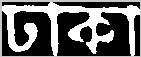

1/1 [==============================] - 0s 203ms/step
prediction accuracy : 1.0
predicted class : ঢাকা


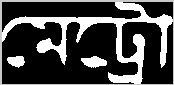

1/1 [==============================] - 0s 210ms/step
prediction accuracy : 1.0
predicted class : মেট্রো


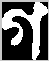

1/1 [==============================] - 0s 205ms/step
prediction accuracy : 1.0
predicted class : গ


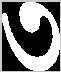

1/1 [==============================] - 0s 202ms/step
prediction accuracy : 1.0
predicted class : ৩


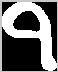

1/1 [==============================] - 0s 203ms/step
prediction accuracy : 1.0
predicted class : স


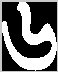

1/1 [==============================] - 0s 212ms/step
prediction accuracy : 1.0
predicted class : ৬


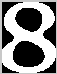

1/1 [==============================] - 0s 211ms/step
prediction accuracy : 1.0
predicted class : ৪


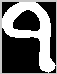

1/1 [==============================] - 0s 208ms/step
prediction accuracy : 1.0
predicted class : স


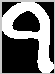

1/1 [==============================] - 0s 197ms/step
prediction accuracy : 1.0
predicted class : স


In [ ]:
#full number plate recognition testing---------------------------------------------------------------------------------------------
for img in crop_imgs:
  # image_path = img
  # img = cv.imread(image_path)
  cv2_imshow(img)
  img = cv2.merge([img,img,img])
  resize_img = cv2.resize(img,(224, 224))
  img = resize_img.reshape(1,224,224,3)

  tags = {0:'০', 1:'১', 2:'২', 3:'৩', 4:'৪', 5:'৫', 6:'৬', 7:'৭', 8:'৮', 9:'৯',
          10:'ঢাকা', 11:'মেট্রো', 12:'খ', 13:'গ', 14:'চ', 15:'ক', 16:'স', 17:'খালী',
          18:'পটুয়া', 19:'পুর', 20:'ম', 21:'ভ', 22:'গাজী', 23:'ঠ'}

  pred = model.predict(img)
  classIndex = tags[int(np.argmax(pred, axis=1))]
  probVal = np.amax(pred)

  print('prediction accuracy :',probVal)
  print('predicted class :',classIndex)

In [ ]:
#full number plate recognition testing---------------------------------------------------------------------------------------------
result = []
for img in crop_imgs:
  img = cv2.merge([img,img,img])
  resize_img = cv2.resize(img,(227, 227))
  img = resize_img.reshape(1,227,227,3)

  tags = {0:'০', 1:'১', 2:'২', 3:'৩', 4:'৪', 5:'৫', 6:'৬', 7:'৭', 8:'৮', 9:'৯',
          10:'ঢাকা', 11:'মেট্রো', 12:'খ', 13:'গ', 14:'চ', 15:'ক', 16:'স', 17:'খালী',
          18:'পটুয়া', 19:'পুর', 20:'ম', 21:'ভ', 22:'গাজী', 23:'ঠ'}

  pred = model.predict(img)
  classIndex = tags[int(np.argmax(pred, axis=1))]
  probVal = np.amax(pred)

  if probVal >0.50:
    result.append(classIndex)
    #print('prediction accuracy :',probVal)
    #print('predicted class :',classIndex)
str1=' '.join([str(elem) for elem in result])

print(str1)


1/1 [==============================] - 0s 226ms/step
ঢাকা মেট্রো গ ৩ স ৬ ৪ স স


In [ ]:
#Inception


# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
from glob import glob
import cv2 as cv
import tensorflow as tf
import os
import cv2
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import pickle
from google.colab.patches import cv2_imshow


# re-size all the images to this
IMAGE_SIZE = [224, 224]

#### IMPORTING DATA/IMAGES FROM FOLDERS
Path = '/content/drive/MyDrive/Colab_Notebooks/capstone/c/character_data'
count = 0
images = []     # LIST CONTAINING ALL THE IMAGES
classNo = []    # LIST CONTAINING ALL THE CORRESPONDING CLASS ID OF IMAGES
myList = os.listdir(Path)
#print("Total Classes Detected:",len(myList))
noOfClasses = len(myList)
#print(myList)

traning_image_dirs = os.listdir(Path) #listdir() returns a list containing the names of the entries in the directory given by path
for dir_name in traning_image_dirs:
  label = str(dir_name)
  training_image_path = Path + "/" + dir_name
  #print(label)

  training_images_names = os.listdir(training_image_path)
  #print(training_images_names)
  for image_name in training_images_names:
            image_path = training_image_path  + "/" + image_name
            image = cv.imread(image_path)
            #print(image.shape)
            resize_img = cv2.resize(image,(224,224))
            images.append(resize_img)
            classNo.append(label)


#print("Total Images in Images List = ",len(images))
#print("Total IDS in classNo List= ",len(classNo))

# CONVERT TO NUMPY ARRAY ---------------------------------------------------------------------------------------
images = np.array(images)
classNo = np.array(classNo)
#cv2_imshow(images[10])
#print(classNo)
#print(images.shape)

# To convert string class to integer
int_classNo=[]
tags = {'০':0, '১':1, '২':2, '৩':3, '৪':4, '৫':5, '৬':6, '৭':7, '৮':8, '৯':9,
        'ঢাকা':10, 'মেট্রো':11, 'খ':12, 'গ':13, 'চ':14, 'ক':15, 'স':16, 'খালী':17,
        'পটুয়া':18, 'পুর':19, 'ম':20, 'ভ':21, 'গাজী':22, 'ঠ':23}

int_classNo = []
v=[]
for x in classNo:
  for key, value in tags.items():
    if x == key:
      int_classNo.append(value)

int_classNo = np.reshape(int_classNo, (len(int_classNo), 1))
#print(int_classNo)

#SPLITTING THE DATA----------------------------------------------------------------------------------
X_train,X_test,y_train,y_test = train_test_split(images,int_classNo,test_size=0.2)
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=0.2)


#Since we have 24 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 24
y_train=to_categorical(y_train)
y_validation=to_categorical(y_validation)
y_test=to_categorical(y_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_validation.shape, y_validation.shape)

# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights


inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

# useful for getting number of output classes
folders = 24

# our layers - you can add more if you want
x = Flatten()(inception.output)

prediction = Dense(24, activation='softmax')(x)

# create a model object
model_inception = Model(inputs=inception.input, outputs=prediction)

# view the structure of the model
model_inception.summary()

# tell the model what cost and optimization method to use
model_inception.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow(X_train, y_train,
                                  batch_size = 32)

# fit the model
r = model_inception.fit(
  training_set,
  epochs=30,
  validation_data=(X_validation,y_validation)
)





(556, 224, 224, 3) (556, 24)
(174, 224, 224, 3) (174, 24)
(139, 224, 224, 3) (139, 24)
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_357 (Conv2D)            (None, 111, 111, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_357 (Batch  (None, 111, 111, 32  96         ['conv2d_357[0][0]']             
 Norm

In [ ]:
from keras.layers import Input, Lambda, Dense, Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
from glob import glob
import cv2 as cv
import tensorflow as tf
import os
import cv2
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import pickle
from google.colab.patches import cv2_imshow


# re-size all the images to this
IMAGE_SIZE = [224, 224]

#### IMPORTING DATA/IMAGES FROM FOLDERS
Path = '/content/drive/MyDrive/Colab_Notebooks/capstone/c/character_data'
count = 0
images = []     # LIST CONTAINING ALL THE IMAGES
classNo = []    # LIST CONTAINING ALL THE CORRESPONDING CLASS ID OF IMAGES
myList = os.listdir(Path)
#print("Total Classes Detected:",len(myList))
noOfClasses = len(myList)
#print(myList)

traning_image_dirs = os.listdir(Path) #listdir() returns a list containing the names of the entries in the directory given by path
for dir_name in traning_image_dirs:
  label = str(dir_name)
  training_image_path = Path + "/" + dir_name
  #print(label)

  training_images_names = os.listdir(training_image_path)
  #print(training_images_names)
  for image_name in training_images_names:
            image_path = training_image_path  + "/" + image_name
            image = cv.imread(image_path)
            #print(image.shape)
            resize_img = cv2.resize(image,(224,224))
            images.append(resize_img)
            classNo.append(label)


#print("Total Images in Images List = ",len(images))
#print("Total IDS in classNo List= ",len(classNo))

# CONVERT TO NUMPY ARRAY ---------------------------------------------------------------------------------------
images = np.array(images)
classNo = np.array(classNo)
#cv2_imshow(images[10])
#print(classNo)
#print(images.shape)

# To convert string class to integer
int_classNo=[]
tags = {'০':0, '১':1, '২':2, '৩':3, '৪':4, '৫':5, '৬':6, '৭':7, '৮':8, '৯':9,
        'ঢাকা':10, 'মেট্রো':11, 'খ':12, 'গ':13, 'চ':14, 'ক':15, 'স':16, 'খালী':17,
        'পটুয়া':18, 'পুর':19, 'ম':20, 'ভ':21, 'গাজী':22, 'ঠ':23}

int_classNo = []
v=[]
for x in classNo:
  for key, value in tags.items():
    if x == key:
      int_classNo.append(value)

int_classNo = np.reshape(int_classNo, (len(int_classNo), 1))
#print(int_classNo)

#SPLITTING THE DATA----------------------------------------------------------------------------------
X_train,X_test,y_train,y_test = train_test_split(images,int_classNo,test_size=0.2)
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=0.2)


#Since we have 24 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 24
y_train=to_categorical(y_train)
y_validation=to_categorical(y_validation)
y_test=to_categorical(y_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_validation.shape, y_validation.shape)

FileNotFoundError: ignored

In [ ]:
#### EVALUATE USING TEST IMAGES
score = model_inception.evaluate(X_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

Test Score =  21.874677658081055
Test Accuracy = 0.9885057210922241


In [ ]:
# predict = model_inception.predict(X_test, verbose=0)

In [ ]:
# from keras.utils import to_categorical
# predict1=np.argmax(predict, axis=-1)
# predict2=to_categorical(predict1)
# predict3 = predict2.flatten()
# predict3.shape


(3654,)

In [ ]:
# y_test1 = y_test.flatten()
# y_test1.shape

(4176,)

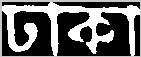

1/1 [==============================] - 2s 2s/step
prediction accuracy : 1.0
predicted class : ঢাকা


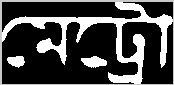

1/1 [==============================] - 0s 176ms/step
prediction accuracy : 1.0
predicted class : মেট্রো


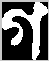

1/1 [==============================] - 0s 175ms/step
prediction accuracy : 1.0
predicted class : গ


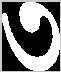

1/1 [==============================] - 0s 170ms/step
prediction accuracy : 1.0
predicted class : ৩


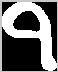

1/1 [==============================] - 0s 168ms/step
prediction accuracy : 1.0
predicted class : ৭


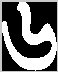

1/1 [==============================] - 0s 171ms/step
prediction accuracy : 1.0
predicted class : ৬


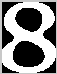

1/1 [==============================] - 0s 170ms/step
prediction accuracy : 1.0
predicted class : ৪


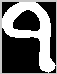

1/1 [==============================] - 0s 180ms/step
prediction accuracy : 1.0
predicted class : ৭


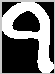

1/1 [==============================] - 0s 195ms/step
prediction accuracy : 1.0
predicted class : ৭


In [ ]:
#full number plate recognition testing---------------------------------------------------------------------------------------------
for img in crop_imgs:
  # image_path = img
  # img = cv.imread(image_path)
  cv2_imshow(img)
  img = cv2.merge([img,img,img])
  resize_img = cv2.resize(img,(224, 224))
  img = resize_img.reshape(1,224,224,3)

  tags = {0:'০', 1:'১', 2:'২', 3:'৩', 4:'৪', 5:'৫', 6:'৬', 7:'৭', 8:'৮', 9:'৯',
          10:'ঢাকা', 11:'মেট্রো', 12:'খ', 13:'গ', 14:'চ', 15:'ক', 16:'স', 17:'খালী',
          18:'পটুয়া', 19:'পুর', 20:'ম', 21:'ভ', 22:'গাজী', 23:'ঠ'}

  pred = model_inception.predict(img)
  classIndex = tags[int(np.argmax(pred, axis=1))]
  probVal = np.amax(pred)

  print('prediction accuracy :',probVal)
  print('predicted class :',classIndex)

In [ ]:
#full number plate recognition testing---------------------------------------------------------------------------------------------
result = []
for img in crop_imgs:
  img = cv2.merge([img,img,img])
  resize_img = cv2.resize(img,(227, 227))
  img = resize_img.reshape(1,227,227,3)

  tags = {0:'০', 1:'১', 2:'২', 3:'৩', 4:'৪', 5:'৫', 6:'৬', 7:'৭', 8:'৮', 9:'৯',
          10:'ঢাকা', 11:'মেট্রো', 12:'খ', 13:'গ', 14:'চ', 15:'ক', 16:'স', 17:'খালী',
          18:'পটুয়া', 19:'পুর', 20:'ম', 21:'ভ', 22:'গাজী', 23:'ঠ'}

  pred = model_inception.predict(img)
  classIndex = tags[int(np.argmax(pred, axis=1))]
  probVal = np.amax(pred)

  if probVal >0.50:
    result.append(classIndex)
    #print('prediction accuracy :',probVal)
    #print('predicted class :',classIndex)
str1=' '.join([str(elem) for elem in result])

print(str1)


1/1 [==============================] - 0s 382ms/step
ঢাকা মেট্রো গ ৩ ৭ ৬ ৪ ৭ ৭


In [ ]:
#VGG19

# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
from glob import glob
import cv2 as cv
import tensorflow as tf
import os
import cv2
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import pickle
from google.colab.patches import cv2_imshow


# re-size all the images to this
IMAGE_SIZE = [224, 224]

#### IMPORTING DATA/IMAGES FROM FOLDERS
Path = '/content/drive/MyDrive/Colab_Notebooks/capstone/c/character_data'
count = 0
images = []     # LIST CONTAINING ALL THE IMAGES
classNo = []    # LIST CONTAINING ALL THE CORRESPONDING CLASS ID OF IMAGES
myList = os.listdir(Path)
#print("Total Classes Detected:",len(myList))
noOfClasses = len(myList)
#print(myList)

traning_image_dirs = os.listdir(Path) #listdir() returns a list containing the names of the entries in the directory given by path
for dir_name in traning_image_dirs:
  label = str(dir_name)
  training_image_path = Path + "/" + dir_name
  #print(label)

  training_images_names = os.listdir(training_image_path)
  #print(training_images_names)
  for image_name in training_images_names:
            image_path = training_image_path  + "/" + image_name
            image = cv.imread(image_path)
            #print(image.shape)
            resize_img = cv2.resize(image,(224,224))
            images.append(resize_img)
            classNo.append(label)


#print("Total Images in Images List = ",len(images))
#print("Total IDS in classNo List= ",len(classNo))

# CONVERT TO NUMPY ARRAY ---------------------------------------------------------------------------------------
images = np.array(images)
classNo = np.array(classNo)
#cv2_imshow(images[10])
#print(classNo)
print(images.shape)

# To convert string class to integer
int_classNo=[]
tags = {'০':0, '১':1, '২':2, '৩':3, '৪':4, '৫':5, '৬':6, '৭':7, '৮':8, '৯':9,
        'ঢাকা':10, 'মেট্রো':11, 'খ':12, 'গ':13, 'চ':14, 'ক':15, 'স':16, 'খালী':17,
        'পটুয়া':18, 'পুর':19, 'ম':20, 'ভ':21, 'গাজী':22, 'ঠ':23}

int_classNo = []
v=[]
for x in classNo:
  for key, value in tags.items():
    if x == key:
      int_classNo.append(value)

int_classNo = np.reshape(int_classNo, (len(int_classNo), 1))
#print(int_classNo)

#SPLITTING THE DATA----------------------------------------------------------------------------------
X_train,X_test,y_train,y_test = train_test_split(images,int_classNo,test_size=0.2)
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=0.2)



#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_validation=to_categorical(y_validation)
y_test=to_categorical(y_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_validation.shape, y_validation.shape)

# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights


vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

# useful for getting number of output classes
folders = 24

# our layers - you can add more if you want
x = Flatten()(vgg19.output)

prediction = Dense(24, activation='softmax')(x)

# create a model object
model_vgg19 = Model(inputs=vgg19.input, outputs=prediction)

# view the structure of the model
model_vgg19.summary()

# tell the model what cost and optimization method to use
model_vgg19.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow(X_train, y_train,
                                  batch_size = 32)

# fit the model
r = model_vgg19.fit(
  training_set,
  epochs=30,
  validation_data=(X_validation,y_validation)
)





(869, 224, 224, 3)
(556, 224, 224, 3) (556, 24)
(174, 224, 224, 3) (174, 24)
(139, 224, 224, 3) (139, 24)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                   

In [ ]:
#save vgg19 model--------------------------------------
model_vgg19.save('./content/drive/MyDrive/Colab_Notebooks/capstone/model_vgg19.h5')

In [ ]:
# EVALUATE USING TEST IMAGES
score = model_vgg19.evaluate(X_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

Test Score =  4.412633895874023
Test Accuracy = 0.982758641242981


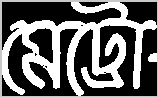

NameError: ignored

In [ ]:
#full number plate recognition testing---------------------------------------------------------------------------------------------
for img in crop_imgs:
  # image_path = img
  # img = cv.imread(image_path)
  cv2_imshow(img)
  img = cv2.merge([img,img,img])
  resize_img = cv2.resize(img,(224, 224))
  img = resize_img.reshape(1,224,224,3)

  tags = {0:'০', 1:'১', 2:'২', 3:'৩', 4:'৪', 5:'৫', 6:'৬', 7:'৭', 8:'৮', 9:'৯',
          10:'ঢাকা', 11:'মেট্রো', 12:'খ', 13:'গ', 14:'চ', 15:'ক', 16:'স', 17:'খালী',
          18:'পটুয়া', 19:'পুর', 20:'ম', 21:'ভ', 22:'গাজী', 23:'ঠ'}

  pred = model_vgg19.predict(img)
  classIndex = tags[int(np.argmax(pred, axis=1))]
  probVal = np.amax(pred)

  print('prediction accuracy :',probVal)
  print('predicted class :',classIndex)

In [ ]:
#full number plate recognition testing---------------------------------------------------------------------------------------------
result = []
for img in crop_imgs:
  img = cv2.merge([img,img,img])
  resize_img = cv2.resize(img,(224, 224))
  img = resize_img.reshape(1,224,224,3)

  tags = {0:'০', 1:'১', 2:'২', 3:'৩', 4:'৪', 5:'৫', 6:'৬', 7:'৭', 8:'৮', 9:'৯',
          10:'ঢাকা', 11:'মেট্রো', 12:'খ', 13:'গ', 14:'চ', 15:'ক', 16:'স', 17:'খালী',
          18:'পটুয়া', 19:'পুর', 20:'ম', 21:'ভ', 22:'গাজী', 23:'ঠ'}

  pred = model_vgg19.predict(img)
  classIndex = tags[int(np.argmax(pred, axis=1))]
  probVal = np.amax(pred)

  if probVal >0.50:
    result.append(classIndex)
    #print('prediction accuracy :',probVal)
    #print('predicted class :',classIndex)
str1=' '.join([str(elem) for elem in result])

print(str1)


#-----------for flask------------------------------------------------------------------------------------------------------------------
# def character_recognition(crop_imgs):
#   result = []
#   for img in crop_imgs:
#     img = cv2.merge([img,img,img])
#     resize_img = cv2.resize(img,(227, 227))
#     img = resize_img.reshape(1,227,227,3)

#     tags = {0:'০', 1:'১', 2:'২', 3:'৩', 4:'৪', 5:'৫', 6:'৬', 7:'৭', 8:'৮', 9:'৯',
#             10:'ঢাকা', 11:'মেট্রো', 12:'খ', 13:'গ', 14:'চ', 15:'ক', 16:'স', 17:'খালী',
#             18:'পটুয়া', 19:'পুর', 20:'ম', 21:'ভ', 22:'গাজী', 23:'ঠ'}

#     pred = model_vgg19.predict(img)
#     classIndex = tags[int(np.argmax(pred, axis=1))]
#     probVal = np.amax(pred)

#     if probVal >0.50:
#       result.append(classIndex)
#       #print('prediction accuracy :',probVal)
#       #print('predicted class :',classIndex)
#   str1=' '.join([str(elem) for elem in result])

#   print(str1)

NameError: ignored

In [ ]:
_

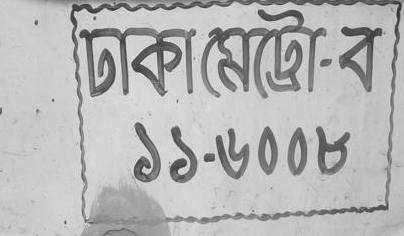

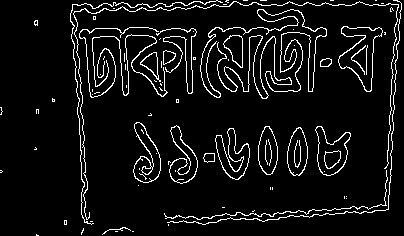

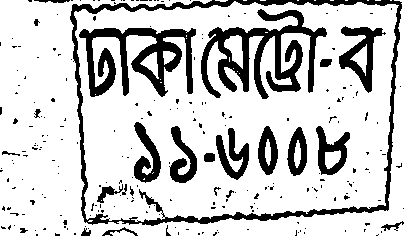

In [ ]:
#enhance number plate---------------------------------------------
# convert to gray
gray1 = cv2.cvtColor(after_validation_img, cv2.COLOR_BGR2GRAY)
#canny----------------------------------------------------------------------------
canny = cv2.Canny(gray1, 170,200)
##cv2_imshow(canny)
adaptive = cv2.adaptiveThreshold(gray1, 255,
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY, 35, 7)

cv2_imshow(gray1)
cv2_imshow(canny)
cv2_imshow(adaptive)

In [ ]:
,

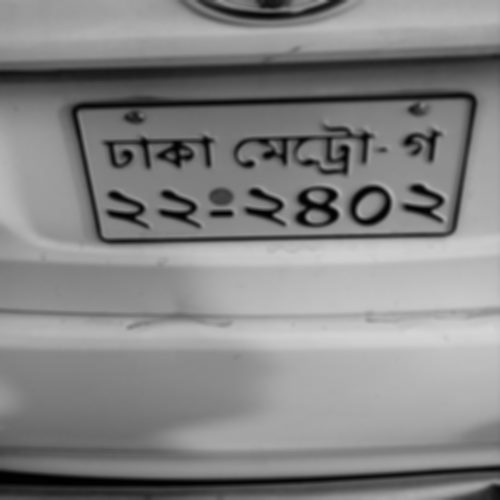

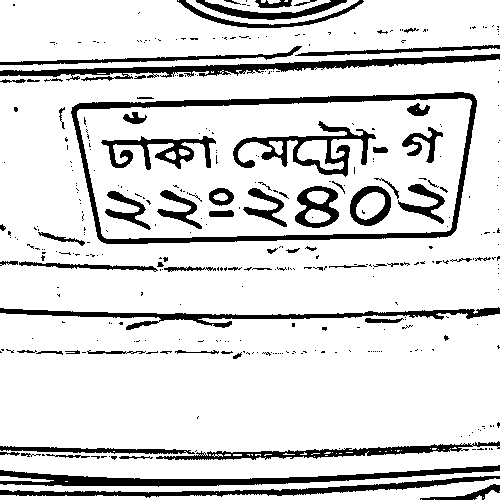

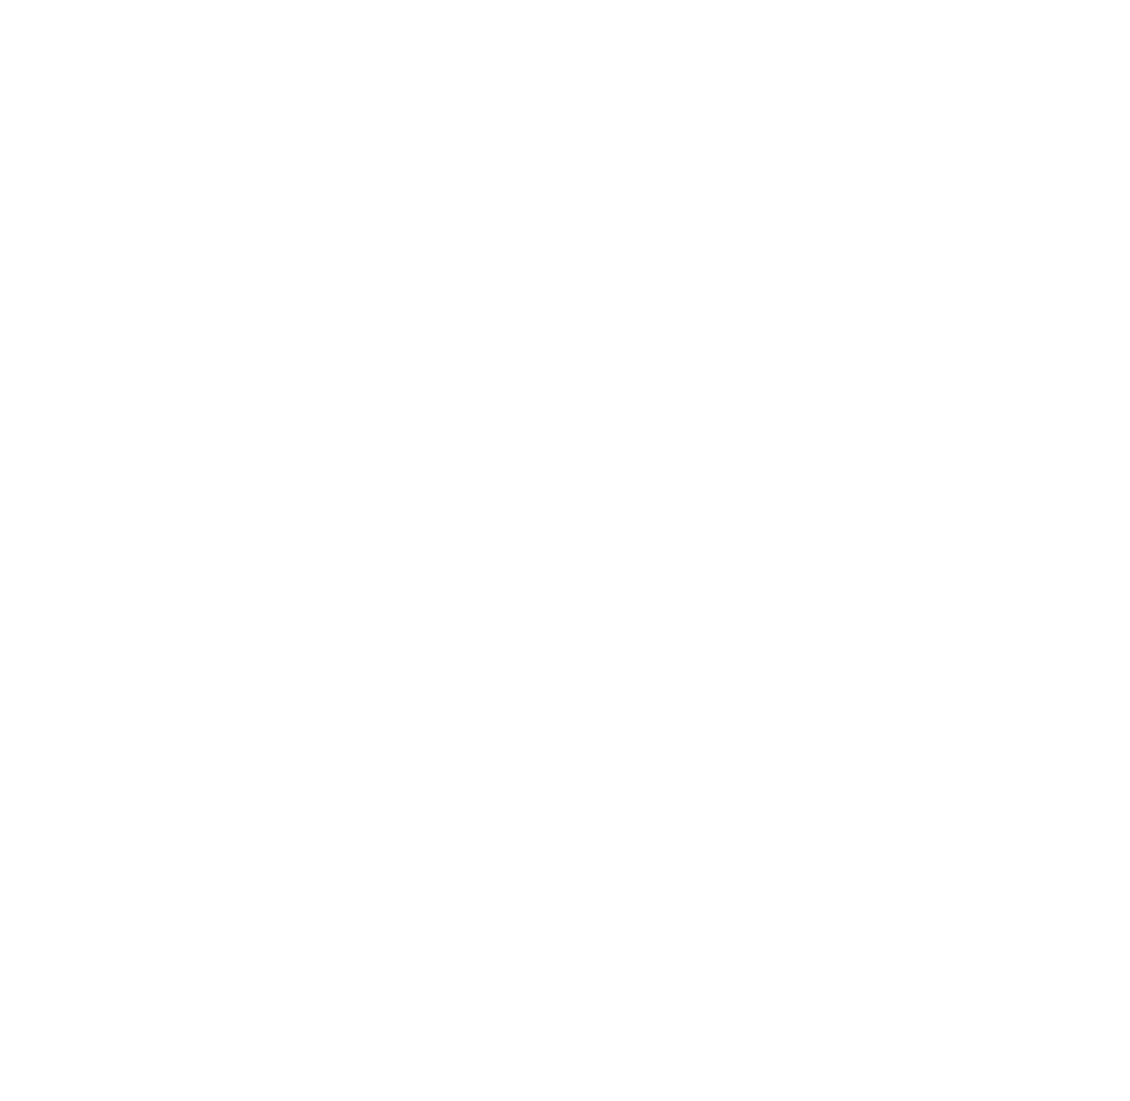

In [ ]:
car = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/capstone/LP_DATASET/car/141.jpg')
gaussian_img = cv2.GaussianBlur(car,(5,5),cv2.BORDER_DEFAULT)
gray_img = cv2.cvtColor(gaussian_img, cv2.COLOR_BGR2GRAY)

blurred_gray_img = cv2.adaptiveThreshold(gray_img, 255,
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 11, 2)
plt.figure(figsize=(20,20))
plt.axis("off")
#plt.imshow(gray_img)

cv2_imshow(gray_img)
#cv2_imshow(gaussian_img)
cv2_imshow(blurred_gray_img)

In [ ]:

import cv2
import numpy as np
from skimage.filters import threshold_local
import tensorflow as tf
from skimage import measure
import imutils
from google.colab.patches import cv2_imshow


def sort_cont(character_contours):
    """
    To sort contours
    """
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in character_contours]

    (character_contours, boundingBoxes) = zip(*sorted(zip(character_contours,
                                                          boundingBoxes),
                                                      key = lambda b: b[1][i],
                                                      reverse = False))

    return character_contours


def segment_chars(plate_img, fixed_width):

    """
    extract Value channel from the HSV format
    of image and apply adaptive thresholding
    to reveal the characters on the license plate
    """
    V = cv2.split(cv2.cvtColor(plate_img, cv2.COLOR_BGR2HSV))[2]

    thresh = cv2.adaptiveThreshold(V, 255,
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY,
                                   11, 2)

    thresh = cv2.bitwise_not(thresh)

    # resize the license plate region to
    # a canoncial size
    plate_img = imutils.resize(plate_img, width = fixed_width)
    thresh = imutils.resize(thresh, width = fixed_width)
    bgr_thresh = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)

    # perform a connected components analysis
    # and initialize the mask to store the locations
    # of the character candidates
    labels = measure.label(thresh, connectivity = 2, background = 0)

    charCandidates = np.zeros(thresh.shape, dtype ='uint8')

    # loop over the unique components
    characters = []
    for label in np.unique(labels):

        # if this is the background label, ignore it
        if label == 0:
            continue
        # otherwise, construct the label mask to display
        # only connected components for the current label,
        # then find contours in the label mask
        labelMask = np.zeros(thresh.shape, dtype ='uint8')
        labelMask[labels == label] = 255

        cnts = cv2.findContours(labelMask,
                     cv2.RETR_EXTERNAL,
                     cv2.CHAIN_APPROX_SIMPLE)

        cnts = cnts[1] if imutils.is_cv2() else cnts[0]

        # ensure at least one contour was found in the mask
        if len(cnts) > 0:

            # grab the largest contour which corresponds
            # to the component in the mask, then grab the
            # bounding box for the contour
            c = max(cnts, key = cv2.contourArea)
            (boxX, boxY, boxW, boxH) = cv2.boundingRect(c)

            # compute the aspect ratio, solodity, and
            # height ration for the component
            aspectRatio = boxW / float(boxH)
            solidity = cv2.contourArea(c) / float(boxW * boxH)
            heightRatio = boxH / float(plate_img.shape[0])

            # determine if the aspect ratio, solidity,
            # and height of the contour pass the rules
            # tests
            keepAspectRatio = aspectRatio < 1.0
            keepSolidity = solidity > 0.15
            keepHeight = heightRatio > 0.5 and heightRatio < 0.95

            # check to see if the component passes
            # all the tests
            if keepAspectRatio and keepSolidity and keepHeight and boxW > 14:

                # compute the convex hull of the contour
                # and draw it on the character candidates
                # mask
                hull = cv2.convexHull(c)

                cv2.drawContours(charCandidates, [hull], -1, 255, -1)

    contours, hier = cv2.findContours(charCandidates,
                                         cv2.RETR_EXTERNAL,
                                         cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        contours = sort_cont(contours)

        # value to be added to each dimension
        # of the character
        addPixel = 4
        for c in contours:
            (x, y, w, h) = cv2.boundingRect(c)
            if y > addPixel:
                y = y - addPixel
            else:
                y = 0
            if x > addPixel:
                x = x - addPixel
            else:
                x = 0
            temp = bgr_thresh[y:y + h + (addPixel * 2),
                              x:x + w + (addPixel * 2)]

            characters.append(temp)

        return characters

    else:
        return None



class PlateFinder:
    def __init__(self):

        # minimum area of the plate
        self.min_area = 4500

        # maximum area of the plate
        self.max_area = 30000

        self.element_structure = cv2.getStructuringElement(
                              shape = cv2.MORPH_RECT, ksize =(22, 3))

    def preprocess(self, input_img):

        imgBlurred = cv2.GaussianBlur(input_img, (7, 7), 0)
        #cv2_imshow(imgBlurred)
        # convert to gray
        gray = cv2.cvtColor(imgBlurred, cv2.COLOR_BGR2GRAY)

        # sobelX to get the vertical edges-------------------------------------------------------------------------------------------------------------------------------
        sobelx = cv2.Sobel(gray, cv2.CV_8U, 1, 0, ksize = 3)
        cv2_imshow(sobelx)
        sobely = cv2.Sobel(gray, cv2.CV_8U, 0, 1, ksize = 3)
        cv2_imshow(sobely)
        sobel = sobelx + sobely
        cv2_imshow(sobel)

        #canny----------------------------------------------------------------------------
        # canny = cv2.Canny(gray, 170,200)
        # cv2_imshow(canny)


        #blurred_gray_img
        # blurred_gray_img = cv2.adaptiveThreshold(sobel, 255,
        #                            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        #                            cv2.THRESH_BINARY, 11, 2)
        # cv2_imshow(blurred_gray_img)

        # otsu's thresholding
        ret2, threshold_img = cv2.threshold(sobel, 0, 255,
                         cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        cv2_imshow(threshold_img)


        # element = self.element_structure
        # morph_n_thresholded_img = threshold_img.copy()
        # cv2.morphologyEx(src = threshold_img,
        #                  op = cv2.MORPH_CLOSE,
        #                  kernel = element,
        #                  dst = morph_n_thresholded_img)
        # #-------------------------------------------------------------------------------------------------------------------------------------------------------------
        # cv2_imshow(morph_n_thresholded_img)
        return threshold_img

    def extract_contours(self, after_preprocess):

        contours, _ = cv2.findContours(after_preprocess,
                                          mode = cv2.RETR_EXTERNAL,
                                          method = cv2.CHAIN_APPROX_NONE)
        return contours

    def clean_plate(self, plate):

        gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
        thresh = cv2.adaptiveThreshold(gray,
                                       255,
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY,
                                       11, 2)

        contours, hierarchy = cv2.findContours(thresh.copy(),
                                          cv2.RETR_EXTERNAL,
                                          cv2.CHAIN_APPROX_NONE)

        if contours:
            areas = [cv2.contourArea(c) for c in contours]

            # index of the largest contour in the area
            # array
            max_index = np.argmax(areas)

            max_cnt = contours[max_index]
            max_cntArea = areas[max_index]
            x, y, w, h = cv2.boundingRect(max_cnt)
            rect = cv2.minAreaRect(max_cnt)

            if not self.ratioCheck(max_cntArea, plate.shape[1],
                                                plate.shape[0]):
                return plate, False, None

            return plate, True, [x, y, w, h]

        else:
            return plate, False, None



    def check_plate(self, input_img, contour):

        min_rect = cv2.minAreaRect(contour)

        if self.validateRatio(min_rect):
            x, y, w, h = cv2.boundingRect(contour)
            after_validation_img = input_img[y:y + h, x:x + w]
            after_clean_plate_img, plateFound, coordinates = self.clean_plate(
                                                        after_validation_img)

            if plateFound:
                characters_on_plate = self.find_characters_on_plate(
                                              after_clean_plate_img)

                if (characters_on_plate is not None and len(characters_on_plate) == 8):
                    x1, y1, w1, h1 = coordinates
                    coordinates = x1 + x, y1 + y
                    after_check_plate_img = after_clean_plate_img

                    return after_check_plate_img, characters_on_plate, coordinates

        return None, None, None



    def find_possible_plates(self, input_img):

        """
        Finding all possible contours that can be plates
        """
        plates = []
        self.char_on_plate = []
        self.corresponding_area = []

        self.after_preprocess = self.preprocess(input_img)
        possible_plate_contours = self.extract_contours(self.after_preprocess)

        #draw------------------------------------------------------------------------------
        image = input_img.copy()
        cv2.drawContours(image,possible_plate_contours,-1,(0,225,0),3)
        cv2_imshow(image)

        for cnts in possible_plate_contours:
            plate, characters_on_plate, coordinates = self.check_plate(input_img, cnts)

            if plate is not None:
                plates.append(plate)
                self.char_on_plate.append(characters_on_plate)
                self.corresponding_area.append(coordinates)

        if (len(plates) > 0):
            return plates

        else:
            return None

    def find_characters_on_plate(self, plate):

        charactersFound = segment_chars(plate, 400)
        if charactersFound:
            return charactersFound

    # PLATE FEATURES
    def ratioCheck(self, area, width, height):

        min = self.min_area
        max = self.max_area

        ratioMin = 3
        ratioMax = 6

        ratio = float(width) / float(height)

        if ratio < 1:
            ratio = 1 / ratio

        if (area < min or area > max) or (ratio < ratioMin or ratio > ratioMax):
            return False

        return True

    def preRatioCheck(self, area, width, height):

        min = self.min_area
        max = self.max_area

        ratioMin = 2.5
        ratioMax = 7

        ratio = float(width) / float(height)

        if ratio < 1:
            ratio = 1 / ratio

        if (area < min or area > max) or (ratio < ratioMin or ratio > ratioMax):
            return False

        return True

    def validateRatio(self, rect):
        (x, y), (width, height), rect_angle = rect

        if (width > height):
            angle = -rect_angle
        else:
            angle = 90 + rect_angle

        if angle > 15:
            return False

        if (height == 0 or width == 0):
            return False

        area = width * height

        if not self.preRatioCheck(area, width, height):
            return False
        else:
            return True

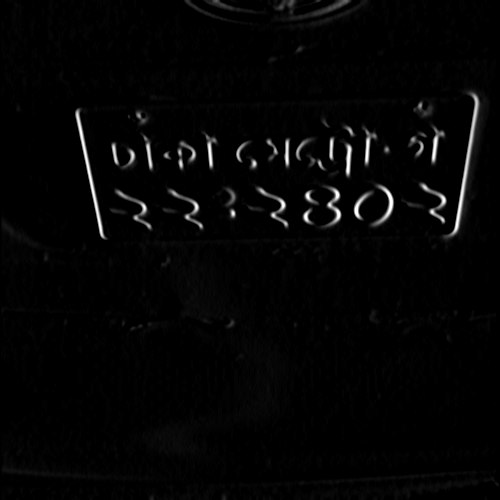

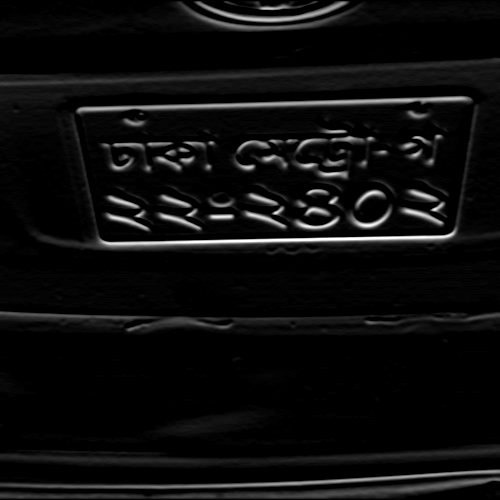

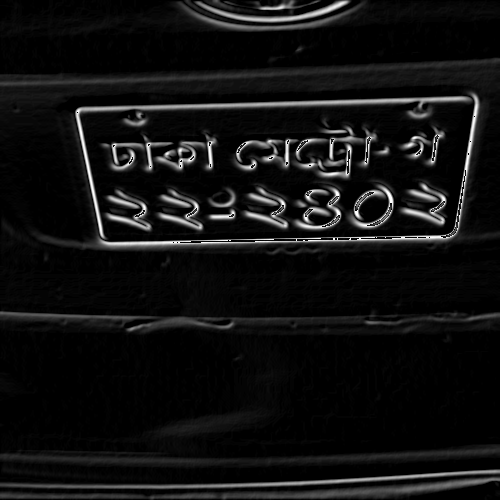

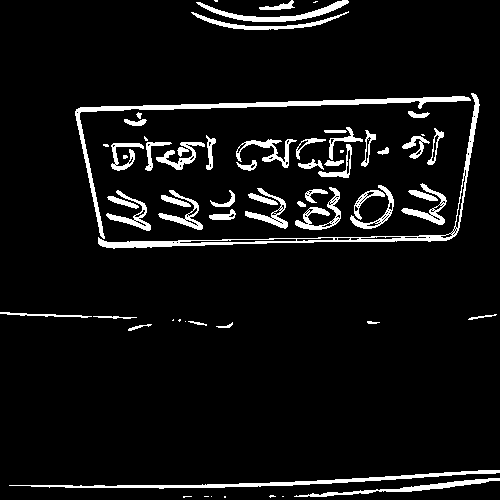

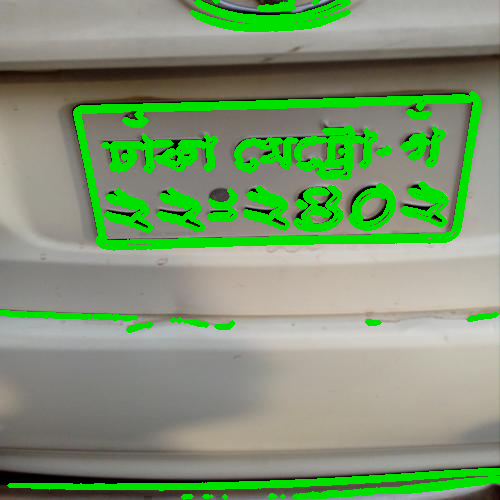

None


In [ ]:
if __name__ == "__main__":
  findPlate = PlateFinder()
  img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/capstone/LP_DATASET/car/149.jpg')
  #cv2_imshow(img)
  possible_plates = findPlate.find_possible_plates(img)
  print(possible_plates)

  if possible_plates is not None:
    for i, p in enumerate(possible_plates):
      chars_on_plate = findPlate.char_on_plate[i]
      cv2_imshow(p)

    cv2.waitkey(0)